In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [34]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Quantas imagens na base de treino?
print(len(x_treino))

# Quantas imagens na base de teste?
print(len(x_teste))

# Qual é o formato de uma imagem?
print(x_treino[0].shape)

# Como são os dados de uma imagem?
print(x_treino[0])

60000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

label 3


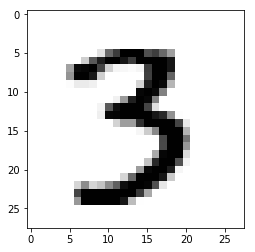

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

indice = 10000
print('label', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [39]:
# Preparação dos Dados

qtde_elementos_treino = len(x_treino) # Irá retornar 60000
qtde_elementos_teste = len(x_teste) # Irá retornar 10000
shape = x_treino[0].shape # Shape possui valor (28, 28)
tamanho_total = shape[0] * shape[1] # 28 * 28

x_treino = x_treino.reshape(qtde_elementos_treino, tamanho_total)
x_teste = x_teste.reshape(qtde_elementos_teste, tamanho_total)

# Quantos itens temos em x_treino[0]?
print(len(x_treino[0]))

# O que temos em x_treino[0]?
print(x_treino[0])

784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   

In [40]:
# Normalização dos dados
# Quanto mais próximo de 255 é o valor, mais próximo ele ficará de 1
# Ex: 255 será igual a 1
# Ex: 127 será igual a 0.49

# Garanto que todos os itens da imagem são float32, em vez de int8
# Assim conseguimos realizar a divisão para todos os números ao mesmo tempo
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

# Normaliza para ficar entre 0 e 1
x_treino /= 255
x_teste /= 255

print(len(x_treino[0]))
print(x_treino[0])

784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.     

In [41]:
# Vamos garantir que ainda temos 60000/10000 samples
# e que cada um tem 784 posições

print('Treino:', x_treino.shape)
print('Teste:', x_teste.shape)

Treino: (60000, 784)
Teste: (10000, 784)


In [50]:
# Vamos ajustar o formato de saída (output)

# O que temos de valor na label 0 em y_treino[0]?
print(y_treino[0])

# Queremos transformar para [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

# O que temos em y_treino?
print(y_treino)

# Quantos itens temos em y_treino?
print(len(y_treino))

# Quais itens únicos temos em y_treino?
print(set(y_treino))

# Quantos itens únicos temos em y_treino?
qtde_itens_unicos = len(set(y_treino))
print(qtde_itens_unicos)

# Converte todos itens para informações categóricas
y_treino = keras.utils.to_categorical(y_treino, qtde_itens_unicos)
y_teste = keras.utils.to_categorical(y_teste, qtde_itens_unicos)

# O que temos agora em y_treino[0]?
print(y_treino[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
60000


TypeError: unhashable type: 'numpy.ndarray'

In [52]:
# Criar a rede neural profunda

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(qtde_itens_unicos, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [55]:
# Treina o modelo

batch_size = 128
epochs = 10

history = model.fit(x_treino, y_treino,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_teste, y_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2568 - acc: 0.9272 - val_loss: 0.1485 - val_acc: 0.9574
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2535 - acc: 0.9274 - val_loss: 0.1497 - val_acc: 0.9585
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2510 - acc: 0.9287 - val_loss: 0.1560 - val_acc: 0.9574
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2444 - acc: 0.9308 - val_loss: 0.1514 - val_acc: 0.9592
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2431 - acc: 0.9327 - val_loss: 0.1564 - val_acc: 0.9590
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2436 - acc: 0.9315 - val_loss: 0.1481 - val_acc: 0.9590
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2396 - acc: 0.9316 - val_loss: 0.1490 - val_acc

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[3.0582384e-04 1.3447475e-02 2.7252685e-03 1.7597218e-03 5.8126147e-03
  1.5650768e-02 3.0691542e-03 2.2037688e-03 9.5122683e-01 3.7984808e-03]]
[8]


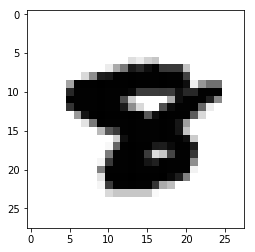

In [74]:
# Testando uma entrada qualquer

indice = 998

print(y_teste[indice])

imagem = x_teste[indice].reshape((1,784))
#print(len(x_teste[indice]))
#print(len(imagem))
#print(x_teste[indice])
#print(imagem)

prediction = model.predict(imagem)
print(prediction)

prediction_class = model.predict_classes(imagem)
print(prediction_class)

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)